In [1]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (14.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and direc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = "/content/drive/MyDrive/final/data/"
DATA_PATH

Mounted at /content/drive


'/content/drive/MyDrive/final/data/'

- 시드값

In [3]:
SEED = 42

- 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 7), (14940, 2), (441196, 7), (12225, 2))

- 공통 피처 파일 불러오기

In [5]:
train_ft = pd.read_csv(f"{DATA_PATH}train_pvt1.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_pvt1.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 759), (12225, 759))

In [ ]:
# train_ft = pd.read_csv(f"{DATA_PATH}train_common.csv") # 학습 데이터(피처)
# test_ft = pd.read_csv(f"{DATA_PATH}test_common.csv") # 테스트 데이터(피처)

# train_ft.shape , test_ft.shape

((14940, 2305), (12225, 2305))

- 정답 데이터

In [6]:
target = train_target["target"]
target

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
14935    0.0
14936    0.0
14937    0.0
14938    1.0
14939    1.0
Name: target, Length: 14940, dtype: float64

# 결측치 처리

In [7]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

Series([], dtype: int64)

In [8]:
mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

Series([], dtype: int64)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [9]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 758), (12225, 758))

## 피처 추가

In [ ]:
# cols = [ col for col in train_ft.columns if col.startswith("pivot_지점코드_") ]

# train_ft["지점코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
# train_ft["지점코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
# train_ft["지점코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["지점코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
# test_ft["지점코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
# test_ft["지점코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1059), (12225, 1059))

In [ ]:
# cols = [ col for col in train_ft.columns if col.startswith("pivot_중분류_") ]

# train_ft["중분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
# train_ft["중분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
# train_ft["중분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["중분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
# test_ft["중분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
# test_ft["중분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1062), (12225, 1062))

In [ ]:
# cols = [ col for col in train_ft.columns if col.startswith("pivot_대분류_") ]

# train_ft["대분류별_구매횟수_std"] = train_ft[cols].std(axis=1)
# train_ft["대분류별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
# train_ft["대분류별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["대분류별_구매횟수_std"] = test_ft[cols].std(axis=1)
# test_ft["대분류별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
# test_ft["대분류별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1065), (12225, 1065))

In [ ]:
# cols = [ col for col in train_ft.columns if col.startswith("pivot_브랜드코드_") ]

# train_ft["브랜드코드별_구매횟수_std"] = train_ft[cols].std(axis=1)
# train_ft["브랜드코드별_구매횟수_skew"] = train_ft[cols].skew(axis=1)
# train_ft["브랜드코드별_구매횟수_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["브랜드코드별_구매횟수_std"] = test_ft[cols].std(axis=1)
# test_ft["브랜드코드별_구매횟수_skew"] = test_ft[cols].skew(axis=1)
# test_ft["브랜드코드별_구매횟수_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1068), (12225, 1068))

In [ ]:
# cols = [ col for col in train_ft.columns if col.endswith("요일_구매비율") ]

# train_ft["요일별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["요일별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["요일별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["요일별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["요일별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["요일별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1071), (12225, 1071))

In [ ]:
# cols = [ col for col in train_ft.columns if col.endswith("월_구매비율") ]

# train_ft["월별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["월별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["월별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["월별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["월별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["월별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1074), (12225, 1074))

In [ ]:
# cols = ["봄_구매비율","여름_구매비율","가을_구매비율","겨울_구매비율"]

# train_ft["계절별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["계절별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["계절별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["계절별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["계절별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["계절별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1077), (12225, 1077))

In [ ]:
# cols = [ col for col in train_ft.columns if col.endswith("분기_구매비율") ]

# train_ft["분기별_구매비율_std"] = train_ft[cols].std(axis=1)
# train_ft["분기별_구매비율_skew"] = train_ft[cols].skew(axis=1)
# train_ft["분기별_구매비율_kurt"] = train_ft[cols].kurt(axis=1)

# test_ft["분기별_구매비율_std"] = test_ft[cols].std(axis=1)
# test_ft["분기별_구매비율_skew"] = test_ft[cols].skew(axis=1)
# test_ft["분기별_구매비율_kurt"] = test_ft[cols].kurt(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1080), (12225, 1080))

In [ ]:
# cols = [ col for col in train_ft.columns if col.endswith("반기_구매비율") ]

# train_ft["반기별_구매비율_std"] = train_ft[cols].std(axis=1)
# test_ft["반기별_구매비율_std"] = test_ft[cols].std(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1081), (12225, 1081))

In [ ]:
# cols = [ col for col in train_ft.columns if col.endswith("년_구매비율") ]

# train_ft["년도별_구매비율_std"] = train_ft[cols].std(axis=1)
# test_ft["년도별_구매비율_std"] = test_ft[cols].std(axis=1)

# train_ft.shape, test_ft.shape

((14940, 1082), (12225, 1082))

## Feature Encoding

- 범주형 피처
    - 주구매지점, 주구매_중분류, 주구매_대분류, 주구매시간대, 선호브랜드코드

In [10]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


In [11]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder(handle_unknown="ignore")
oh_enc_cols = ["주구매지점", "주구매시간대", "주구매_대분류"]

oh_enc.fit(train_ft[oh_enc_cols])

train_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(train_ft[oh_enc_cols]).toarray()
test_ft[oh_enc.get_feature_names_out()] = oh_enc.transform(test_ft[oh_enc_cols]).toarray()

train_ft.shape, test_ft.shape

((14940, 799), (12225, 799))

In [12]:
train_ft['선호브랜드코드'] = train_ft['선호브랜드코드'].astype('category')
test_ft['선호브랜드코드'] = test_ft['선호브랜드코드'].astype('category')

combined_brands = pd.concat([train_ft['선호브랜드코드'], test_ft['선호브랜드코드']])

enc = ce.CountEncoder()
train_ft["선호브랜드코드_cnt"] = enc.fit_transform(train_ft[['선호브랜드코드']])
test_ft["선호브랜드코드_cnt"] = enc.transform(test_ft[['선호브랜드코드']])

train_ft.drop(columns=["선호브랜드코드"], inplace=True)
test_ft.drop(columns=["선호브랜드코드"], inplace=True)

train_ft.shape, test_ft.shape

((14940, 799), (12225, 799))

In [ ]:
# combined_categories = pd.concat([train_ft['주구매_중분류'], test_ft['주구매_중분류']])

# enc = ce.count.CountEncoder()
# train_ft["주구매_중분류_cnt"] = enc.fit_transform(train_ft[["주구매_중분류"]])
# test_ft["주구매_중분류_cnt"] = enc.transform(test_ft[["주구매_중분류"]])

# train_ft.shape, test_ft.shape

((14940, 1124), (12225, 1124))

- 문자열 피처 삭제

In [13]:
cols = train_ft.select_dtypes(["object", "datetime"]).columns.tolist()
cols

['주구매지점', '주구매_중분류', '주구매_대분류']

In [14]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 796), (12225, 796))

In [15]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

In [16]:
train_ft.select_dtypes("datetime").columns, test_ft.select_dtypes("datetime").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Feature Scaling

In [ ]:
train_ft.isin([np.inf, -np.inf]).any().sum(), test_ft.isin([np.inf, -np.inf]).any().sum()

(0, 0)

In [ ]:
train_ft.isna().sum().sum(), test_ft.isna().sum().sum(), train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0, 0, 0)

In [17]:
missing_columns = train_ft.columns[train_ft.isnull().any()]
print("결측치가 있는 열:", missing_columns)

결측치가 있는 열: Index([], dtype='object')


In [ ]:
train_ft = train_ft.fillna(0)
test_ft = test_ft.fillna(0)

In [ ]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, Normalizer, Binarizer, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
# model = LogisticRegression(random_state=SEED)
model = LGBMClassifier(random_state=SEED)

scaler_cls_list = [StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, Normalizer, Binarizer, QuantileTransformer]

# 스케일링 클래스별 점수 확인
def check_scaling_score(scaler_cls_list, x, y, model, scoring, cv):
  for scaler_cls in scaler_cls_list:
    scaler = scaler_cls()
    x_train = scaler.fit_transform(x)
    scores = cross_val_score(model, x_train, y, scoring=scoring, cv=cv, n_jobs=-1)
    print(scaler_cls.__name__ ,scores.mean())

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# LogisticRegression
check_scaling_score(scaler_cls_list, train_ft, target, model, "f1_macro", cv)

In [ ]:
# LGBMClassifier
check_scaling_score(scaler_cls_list, train_ft, target, model, "f1_macro", cv)

StandardScaler 0.717080597938112
MinMaxScaler 0.715220618750797
RobustScaler 0.7178881568570233
PowerTransformer 0.7180642771553271
Normalizer 0.7158376410511454
Binarizer 0.7113069998820072
QuantileTransformer 0.7175298753782104


In [19]:
scaler = PowerTransformer()

train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

train_ft.head()

총방문일수   백화점이용기간      구매주기    주말방문일수  일별평균구매건수  구매간격_표준편차     주구매요일  \
0 -0.222994 -0.115142  0.474870 -0.056044 -0.123173   0.289796 -0.425902   
1  0.650322  0.918164 -0.205176 -0.563591  0.714114  -0.403157  0.158431   
2  1.683434  0.962652 -1.154764  1.474168  0.473778  -1.066007 -1.730682   
3  2.219534  0.840643 -1.655317  1.966257  0.798830  -1.339992  0.716650   
4  0.791786  0.491853 -0.431048  0.914732 -0.252798  -0.385700  0.716650   

   월요일_구매비율  화요일_구매비율  수요일_구매비율  ...  주구매_대분류_여성캐주얼  주구매_대분류_여성캐쥬얼  \
0 -0.158987 -1.232087  1.404129  ...      -0.140695      -0.073373   
1 -0.458156  1.191836  0.755436  ...      -0.140695      -0.073373   
2  1.227744  0.770597  0.146146  ...      -0.140695      -0.073373   
3 -0.109640  0.199488  0.492094  ...      -0.140695      -0.073373   
4 -0.023510 -0.426431 -0.258546  ...      -0.140695      -0.073373   

   주구매_대분류_영라이브  주구매_대분류_영어덜트캐쥬얼  주구매_대분류_영캐릭터  주구매_대분류_영플라자  주구매_대분류_잡화파트  \
0     -0.125594        -0.072445     -0.083726     -0.230867     -0.349949   
1     -0.125594        -0.072445     -0.083726      4.331501     -0.349949   
2     -0.125594        -0.072445     -0.083726     -0.230867     -0.349949   
3     -0.125594        -0.072445     -0.083726     -0.230867     -0.349949   
4     -0.125594        -0.072445     -0.083726     -0.230867     -0.349949   

   주구매_대분류_케주얼_구두_아동  주구매_대분류_패션잡화  선호브랜드코드_cnt  
0          -0.271122      3.076066    -1.715817  
1          -0.271122     -0.325091     0.991690  
2          -0.271122     -0.325091    -1.455956  
3           3.688374     -0.325091    -0.626518  
4          -0.271122     -0.325091     0.991690  

[5 rows x 796 columns]

In [20]:
train_ft.shape, test_ft.shape

((14940, 796), (12225, 796))

# 차원축소

In [21]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
vt.fit(train_ft)

train_vt = pd.DataFrame(vt.transform(train_ft), columns=train_ft.columns[vt.get_support()])
test_vt = test_ft[train_vt.columns]

train_vt.shape, test_vt.shape

((14940, 795), (12225, 795))

In [22]:
model = LGBMClassifier(random_state=SEED)
model.fit(train_vt, target)

scores = cross_val_score(model, train_vt, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.131882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52669
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 754
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


0.7180642771553271

- XAI

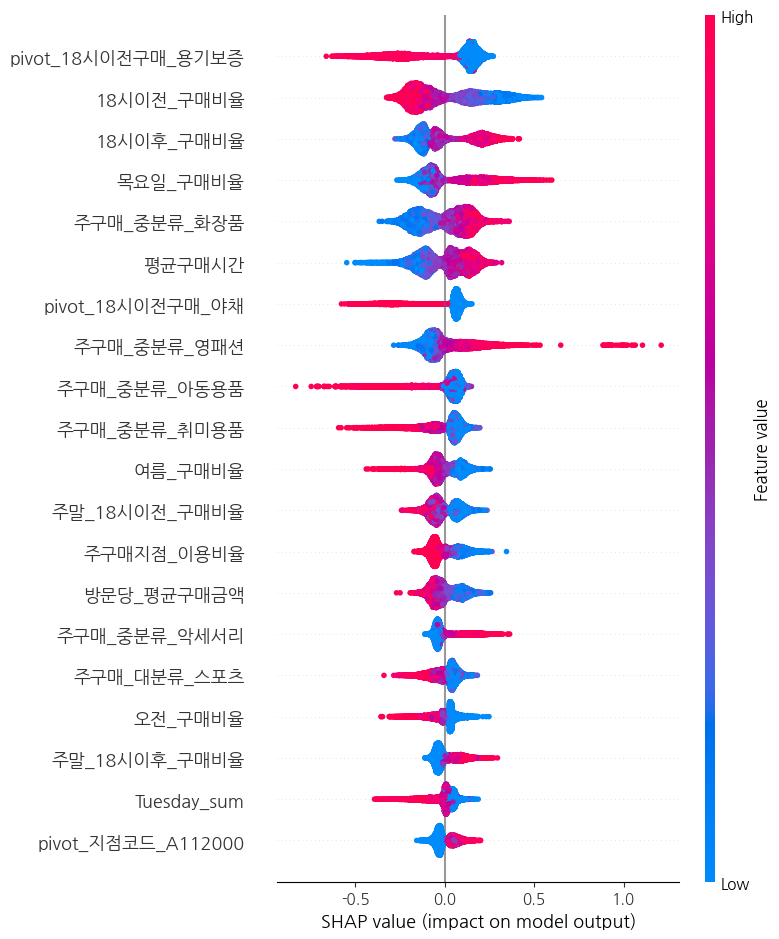

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(train_vt)
shap.summary_plot(shap_values, train_vt)

- SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=SEED)

# thresholds = [
#     'mean', 'median',
#     '0.5*mean', '0.8*mean', '1.2*mean', '1.5*mean', '1.8*mean', '2*mean',
#     '0.5*median', '0.8*median', '1.2*median', '1.5*median', '1.8*median', '2*median'
# ]

thresholds = [f"{i}*median" for i in np.arange(0.1, 1.1, 0.1)]

for threshold in thresholds:
    sfm = SelectFromModel(threshold=threshold, estimator=rf)
    sfm.fit(train_vt, target)
    train_sfm = sfm.transform(train_vt)

    scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(threshold, np.mean(scores), train_sfm.shape[1])

0.1*median 0.7170714460180526 733
0.2*median 0.7202061545433776 676
0.30000000000000004*median 0.7162499974071107 625
0.4*median 0.7160817971527359 589
0.5*median 0.7194507230903969 540
0.6*median 0.7157022583759319 501
0.7000000000000001*median 0.7156319106993532 469
0.8*median 0.7139170807778832 440
0.9*median 0.7151522884045576 414
1.0*median 0.7154032005599711 398


In [ ]:
sfm = SelectFromModel(rf, threshold='0.2*median')
train_sfm = sfm.fit_transform(train_vt, target)
test_sfm = sfm.transform(test_vt)

scores = cross_val_score(model, train_sfm, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_sfm.shape, test_sfm.shape

(0.7202061545433776, (14940, 676), (12225, 676))

In [ ]:
train_sfm = pd.DataFrame(train_sfm, columns=train_vt.columns[sfm.get_support()])
test_sfm = pd.DataFrame(test_sfm, columns=test_vt.columns[sfm.get_support()])

feature_importance = pd.DataFrame({
    'feature': train_sfm.columns,
    'score': sfm.estimator_.feature_importances_[sfm.get_support()]
}).reset_index(drop=True)

feature_importance.sort_values('score', ascending=False).head(30)

feature     score
49               평균구매시간  0.020778
50               야간구매비율  0.016805
53              저녁_구매비율  0.015803
44           18시이전_구매비율  0.015754
45           18시이후_구매비율  0.014261
55        평일_18시이후_구매비율  0.013307
66          주구매_중분류_화장품  0.011420
63          주구매_중분류_영패션  0.010348
10             목요일_구매비율  0.010030
500  pivot_18시이전구매_용기보증  0.009879
85               최대구매금액  0.009593
81                총구매금액  0.009330
634          방문당_평균구매금액  0.009315
83               평균구매금액  0.008988
56        주말_18시이전_구매비율  0.008471
633        구매주기_대비_구매금액  0.008329
87             구매금액표준편차  0.008191
84          구매금액_median  0.008189
86               최소구매금액  0.008136
52              점심_구매비율  0.007816
54        평일_18시이전_구매비율  0.007793
39           마지막구매후_경과일  0.007510
88            구매금액_skew  0.007313
632        방문일수_대비_구매건수  0.007279
4              일별평균구매건수  0.007235
623          Monday_sum  0.007174
1               백화점이용기간  0.007149
628       Wednesday_sum  0.006944
42             구매간격_최대값  0.006937
485    pivot_18시이전구매_야채  0.006922

- SelectKBest

In [23]:
from sklearn.feature_selection import SelectKBest

In [ ]:
for k in range(100, 751, 50):
    skb = SelectKBest(k=k)
    train_skb = skb.fit_transform(train_vt, target)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=100, 정확도=0.705562717243161
특성수=150, 정확도=0.7070040978789804
특성수=200, 정확도=0.711859808184831
특성수=250, 정확도=0.7132921613854792
특성수=300, 정확도=0.7139835592448972
특성수=350, 정확도=0.712900811728858
특성수=400, 정확도=0.7127746424779972
특성수=450, 정확도=0.7166334630111058
특성수=500, 정확도=0.7142648756480787
특성수=550, 정확도=0.7152739761140656
특성수=600, 정확도=0.7154534693078245
특성수=650, 정확도=0.7168185315006547
특성수=700, 정확도=0.7188674824343109
특성수=750, 정확도=0.714249952467678


In [ ]:
for k in range(650, 701, 5):
    skb = SelectKBest(k=k)
    train_skb = skb.fit_transform(train_vt, target)

    scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"특성수={k}, 정확도={np.mean(scores)}")

특성수=650, 정확도=0.7168185315006547
특성수=655, 정확도=0.7149594440861569
특성수=660, 정확도=0.7133054898991439
특성수=665, 정확도=0.7138978803182094
특성수=670, 정확도=0.7153902069022304
특성수=675, 정확도=0.7153902069022304
특성수=680, 정확도=0.7164811870696066
특성수=685, 정확도=0.7201508705332812
특성수=690, 정확도=0.7169665358930978
특성수=695, 정확도=0.7167778889180847
특성수=700, 정확도=0.7188674824343109


In [24]:
skb = SelectKBest(k=685)
train_skb = skb.fit_transform(train_vt, target)
test_skb = skb.transform(test_vt)

scores = cross_val_score(model, train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), train_skb.shape

(0.7201508705332812, (14940, 685))

In [ ]:
feature_scores = pd.DataFrame(
    {'feature': train_vt.columns,
     'score': skb.scores_}
).sort_values('score', ascending=False)

feature_scores.head(30)

feature        score
49               평균구매시간  1449.703440
44           18시이전_구매비율  1407.886405
45           18시이후_구매비율  1361.621826
50               야간구매비율  1361.621826
53              저녁_구매비율  1217.813742
55        평일_18시이후_구매비율  1065.759133
587  pivot_18시이전구매_용기보증   919.617678
284      pivot_중분류_용기보증   823.486080
48               주구매시간대   781.181175
66          주구매_중분류_화장품   747.759118
52              점심_구매비율   718.078381
46              오전_구매비율   707.329461
569    pivot_18시이전구매_야채   705.540476
47              오후_구매비율   694.234707
266        pivot_중분류_야채   658.232939
56        주말_18시이전_구매비율   652.009660
720       pivot_대분류_생식품   582.370492
81                총구매금액   569.379106
62          중분류_nunique   518.503376
82                 구매건수   511.085907
38            연도별평균구매건수   506.242726
630  pivot_18시이전구매_주방용품   496.784599
749        구매주기_대비_구매금액   483.578913
27             월별평균구매건수   478.371870
327      pivot_중분류_주방용품   458.318619
210        pivot_중분류_생선   454.334211
744       Wednesday_sum   452.293094
3                주말방문일수   439.435675
513    pivot_18시이전구매_생선   435.341821
54        평일_18시이전_구매비율   427.515825

- SelectPercentile

In [ ]:
from sklearn.feature_selection import SelectPercentile

percentiles = [i for i in range(5, 101, 5)]

for percentile in percentiles:
    sp = SelectPercentile(percentile=percentile)
    train_sp = sp.fit_transform(train_vt, target)

    scores = cross_val_score(model, train_sp, target, cv=cv, scoring="f1_macro", n_jobs=-1)
    print(f"percentile={percentile}, 성능={np.mean(scores)}, 특성 수={train_sp.shape[1]}")

percentile=5, 성능=0.6816882517472413, 특성 수=40
percentile=10, 성능=0.7052382291207302, 특성 수=80
percentile=15, 성능=0.7096097749920827, 특성 수=120
percentile=20, 성능=0.7086872593394897, 특성 수=159
percentile=25, 성능=0.7133616902287712, 특성 수=199
percentile=30, 성능=0.7128789419959678, 특성 수=239
percentile=35, 성능=0.7147780129065439, 특성 수=278
percentile=40, 성능=0.712813027940744, 특성 수=318
percentile=45, 성능=0.7123873581532056, 특성 수=358
percentile=50, 성능=0.7128346407394226, 특성 수=397
percentile=55, 성능=0.7157968024094798, 특성 수=437
percentile=60, 성능=0.7149923685418169, 특성 수=477
percentile=65, 성능=0.7150145167447818, 특성 수=517
percentile=70, 성능=0.7151434999536086, 특성 수=556
percentile=75, 성능=0.7168218114079539, 특성 수=596
percentile=80, 성능=0.7164423858010615, 특성 수=636
percentile=85, 성능=0.7153902069022304, 특성 수=675
percentile=90, 성능=0.7159508510702066, 특성 수=715
percentile=95, 성능=0.714249952467678, 특성 수=755
percentile=100, 성능=0.7180642771553271, 특성 수=795


- PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95, random_state=SEED)
pca_train = pca.fit_transform(train_vt)
pca_test = pca.transform(test_vt)

scores = cross_val_score(model, pca_train, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), pca_train.shape

(0.7048067648655351, (14940, 382))

In [ ]:
pca = PCA(0.95, random_state=SEED)
pca_train_skb = pca.fit_transform(train_skb)
pca_test_skb = pca.transform(test_skb)

scores = cross_val_score(model, pca_train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), pca_train_skb.shape

(0.705382421133349, (14940, 339))

- LDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
lda_train_skb = lda.fit_transform(train_skb, target)
lda_test_skb = lda.transform(test_skb)

scores = cross_val_score(model, lda_train_skb, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores), lda_train_skb.shape

(0.7426749327532949, (14940, 1))

- 학습 시켜볼 데이터

In [ ]:
train_vt.shape, test_vt.shape, train_skb.shape, test_skb.shape, lda_train_skb.shape, lda_test_skb.shape

((14940, 795),
 (12225, 795),
 (14940, 685),
 (12225, 685),
 (14940, 1),
 (12225, 1))

# 하이퍼파라미터 튜닝

In [26]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.3 MB/s eta 0:00:00


In [27]:
import optuna

In [28]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [29]:
class HyperarameterTuner:
    def __init__(self, model, params, train, target):
        self.model = model
        self.params = params
        self.train = train
        self.target = target
        self.cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
        self.study = optuna.create_study(direction="maximize")

    def objective(self, trial):
        params = {}
        for param_name, param_range in self.params.items():
            if param_range["type"] == "int":
                params[param_name] = trial.suggest_int(param_name, param_range["min"], param_range["max"])
            elif param_range["type"] == "float":
                params[param_name] = trial.suggest_float(param_name, param_range["min"], param_range["max"])
            elif param_range["type"] == "categorical":
                params[param_name] = trial.suggest_categorical(param_name, param_range["values"])

        model = self.model(**params)
        scores = cross_val_score(model, self.train, self.target, cv=self.cv, scoring="f1_macro", n_jobs=-1).mean()
        return scores

    def optimize(self, n_trials):
        self.study.optimize(self.objective, n_trials=n_trials)

    def best_params(self):
        return self.study.best_params

    def best_score(self):
        return self.study.best_value

In [ ]:
params = {
    'num_leaves': {"type": "int", "min": 31, "max": 100},
    'max_depth': {"type": "int", "min": 5, "max": 50},
    'min_child_samples': {"type": "int", "min": 20, "max": 50},
    'learning_rate': {"type": "float", "min": 0.01, "max": 0.3},
    'is_unbalance': {"type": "categorical", "values": [True]},
}

tuner = HyperarameterTuner(LGBMClassifier, params, train_vt, target)
tuner.optimize(n_trials=30)

[I 2024-11-13 01:40:37,598] A new study created in memory with name: no-name-819e4333-e369-4aec-8867-3201bbea2fa0
[I 2024-11-13 01:41:16,445] Trial 0 finished with value: 0.7100099095300008 and parameters: {'num_leaves': 62, 'max_depth': 43, 'min_child_samples': 42, 'learning_rate': 0.280201132023306, 'is_unbalance': True}. Best is trial 0 with value: 0.7100099095300008.
[I 2024-11-13 01:41:57,661] Trial 1 finished with value: 0.7109525427736326 and parameters: {'num_leaves': 79, 'max_depth': 18, 'min_child_samples': 24, 'learning_rate': 0.19146393889119387, 'is_unbalance': True}. Best is trial 1 with value: 0.7109525427736326.
[I 2024-11-13 01:42:30,562] Trial 2 finished with value: 0.7104469827456368 and parameters: {'num_leaves': 54, 'max_depth': 14, 'min_child_samples': 31, 'learning_rate': 0.22299828731911892, 'is_unbalance': True}. Best is trial 1 with value: 0.7109525427736326.
[I 2024-11-13 01:43:03,542] Trial 3 finished with value: 0.7121117407877933 and parameters: {'num_leav

In [ ]:
# {'num_leaves': 46, 'max_depth': 22, 'min_child_samples': 40, 'learning_rate': 0.056640288883701914, 'is_unbalance': True}. Best is trial 16 with value: 0.7246802560203152

In [ ]:
params = {
    'num_leaves': {"type": "int", "min": 31, "max": 100},
    'max_depth': {"type": "int", "min": 5, "max": 50},
    'min_child_samples': {"type": "int", "min": 20, "max": 50},
    'learning_rate': {"type": "float", "min": 0.01, "max": 0.3},
    'is_unbalance': {"type": "categorical", "values": [True]},
}

tuner = HyperarameterTuner(LGBMClassifier, params, train_skb, target)
tuner.optimize(n_trials=30)

[I 2024-11-13 01:57:15,820] A new study created in memory with name: no-name-f59afddd-5d84-4caa-80f7-df40edd68bdf
[I 2024-11-13 01:57:48,607] Trial 0 finished with value: 0.7214954240920054 and parameters: {'num_leaves': 55, 'max_depth': 49, 'min_child_samples': 37, 'learning_rate': 0.08086252108143553, 'is_unbalance': True}. Best is trial 0 with value: 0.7214954240920054.
[I 2024-11-13 01:58:26,701] Trial 1 finished with value: 0.7171561080977992 and parameters: {'num_leaves': 85, 'max_depth': 50, 'min_child_samples': 40, 'learning_rate': 0.15190670443066462, 'is_unbalance': True}. Best is trial 0 with value: 0.7214954240920054.
[I 2024-11-13 01:59:08,220] Trial 2 finished with value: 0.7189955501222605 and parameters: {'num_leaves': 80, 'max_depth': 41, 'min_child_samples': 28, 'learning_rate': 0.08524958103122851, 'is_unbalance': True}. Best is trial 0 with value: 0.7214954240920054.
[I 2024-11-13 01:59:38,173] Trial 3 finished with value: 0.7121340625785961 and parameters: {'num_le

In [ ]:
# {'num_leaves': 70, 'max_depth': 34, 'min_child_samples': 39, 'learning_rate': 0.08466381173060597, 'is_unbalance': True}. Best is trial 22 with value: 0.7253384447927728

In [ ]:
params = {
    'num_leaves': {"type": "int", "min": 31, "max": 100},
    'max_depth': {"type": "int", "min": 5, "max": 50},
    'min_child_samples': {"type": "int", "min": 20, "max": 50},
    'learning_rate': {"type": "float", "min": 0.01, "max": 0.3},
    'is_unbalance': {"type": "categorical", "values": [True]},
}

tuner = HyperarameterTuner(LGBMClassifier, params, lda_train_skb, target)
tuner.optimize(n_trials=30)

[I 2024-11-13 02:13:14,482] A new study created in memory with name: no-name-e866ce38-edfb-474a-a19d-4da3e1a2b231
[I 2024-11-13 02:13:16,135] Trial 0 finished with value: 0.7435140218636027 and parameters: {'num_leaves': 81, 'max_depth': 35, 'min_child_samples': 41, 'learning_rate': 0.166390571580961, 'is_unbalance': True}. Best is trial 0 with value: 0.7435140218636027.
[I 2024-11-13 02:13:17,656] Trial 1 finished with value: 0.7450034518995148 and parameters: {'num_leaves': 86, 'max_depth': 30, 'min_child_samples': 30, 'learning_rate': 0.02431849316784217, 'is_unbalance': True}. Best is trial 1 with value: 0.7450034518995148.
[I 2024-11-13 02:13:19,594] Trial 2 finished with value: 0.7435140218636027 and parameters: {'num_leaves': 89, 'max_depth': 43, 'min_child_samples': 45, 'learning_rate': 0.2082532716980898, 'is_unbalance': True}. Best is trial 1 with value: 0.7450034518995148.
[I 2024-11-13 02:13:20,419] Trial 3 finished with value: 0.7430973364194019 and parameters: {'num_leave

In [ ]:
# {'num_leaves': 36, 'max_depth': 21, 'min_child_samples': 39, 'learning_rate': 0.019283098658142428, 'is_unbalance': True}. Best is trial 11 with value: 0.7473328512733838

In [ ]:
params = {
    'n_estimators': {"type": "int", "min": 100, "max": 300},
    'learning_rate': {"type": "float", "min": 0.1, "max": 0.5},
    'num_leaves': {"type": "categorical", "values": ["93"]},
    'max_depth': {"type": "categorical", "values": ["5"]},
    'subsample': {"type": "float", "min": 0.8, "max": 1.0},
    'min_child_samples': {"type": "categorical", "values": ["29"]},
    'is_unbalance': {"type": "categorical", "values": [True]},
    'gamma': {"type": "float", "min": 0, "max": 1.0},
    'alpha': {"type": "float", "min": 0, "max": 1.0},
    'lambda': {"type": "float", "min": 1.0, "max": 2.0},
}

tuner = HyperarameterTuner(XGBClassifier, params, lda_train_skb, target)
tuner.optimize(n_trials=30)

[I 2024-11-13 03:09:47,709] A new study created in memory with name: no-name-3f201f6c-eb70-4368-af45-58512bf4d5a0
[I 2024-11-13 03:09:48,659] Trial 0 finished with value: 0.7390081227233656 and parameters: {'n_estimators': 286, 'learning_rate': 0.39571320578488833, 'num_leaves': '93', 'max_depth': '5', 'subsample': 0.8016528022161041, 'min_child_samples': '29', 'is_unbalance': True, 'gamma': 0.6454224938853752, 'alpha': 0.06823483367084504, 'lambda': 1.072346118955004}. Best is trial 0 with value: 0.7390081227233656.
[I 2024-11-13 03:09:49,028] Trial 1 finished with value: 0.7442274688637003 and parameters: {'n_estimators': 106, 'learning_rate': 0.33677550468877504, 'num_leaves': '93', 'max_depth': '5', 'subsample': 0.8578795637779557, 'min_child_samples': '29', 'is_unbalance': True, 'gamma': 0.7857827083083224, 'alpha': 0.3070946485479047, 'lambda': 1.843155057511766}. Best is trial 1 with value: 0.7442274688637003.
[I 2024-11-13 03:09:49,905] Trial 2 finished with value: 0.7425394366

In [ ]:
# {'n_estimators': 245, 'learning_rate': 0.41200326684575306, 'num_leaves': '93', 'max_depth': '5', 'subsample': 0.982955738671843, 'min_child_samples': '29', 'is_unbalance': True, 'gamma': 0.9143366157020726, 'alpha': 0.8788261967385123, 'lambda': 1.866590371228826}. Best is trial 4 with value: 0.7470167999017967

In [ ]:
params = {
    'n_estimators': {"type": "int", "min": 208, "max": 208},
    'max_depth': {"type": "int", "min": 5, "max": 5},
    'min_samples_split': {"type": "int", "min": 3, "max": 3},
    'min_samples_leaf': {"type": "int", "min": 4, "max": 4},
    'criterion': {"type": "categorical", "values": ["entropy", "gini"]},
    'max_samples': {"type": "float", "min": 0.8, "max": 1},
}

tuner = HyperarameterTuner(RandomForestClassifier, params, lda_train_skb, target)
tuner.optimize(n_trials=30)

[I 2024-11-13 03:34:33,895] A new study created in memory with name: no-name-90f205b9-f3a4-4019-bb74-d85bcc115a21
[I 2024-11-13 03:34:44,582] Trial 0 finished with value: 0.7466603236691454 and parameters: {'n_estimators': 208, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4, 'criterion': 'entropy', 'max_samples': 0.9985203182551929, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7466603236691454.
[I 2024-11-13 03:34:55,674] Trial 1 finished with value: 0.7468988866635762 and parameters: {'n_estimators': 208, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4, 'criterion': 'gini', 'max_samples': 0.9165898854602543, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7468988866635762.
[W 2024-11-13 03:34:55,709] Trial 2 failed with parameters: {'n_estimators': 208, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4, 'criterion': 'entropy', 'max_samples': 0.8225079999090594, 'max_features': 'auto'} because of the following error: ValueError(

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


In [ ]:
# {'n_estimators': 208, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 15 with value: 0.7469744477877128

In [ ]:
params = {
    'penalty': {"type": "categorical", "values": ["l2", None]},
    'C': {"type": "float", "min": 0.5, "max": 2},
    'max_iter': {"type": "int", "min": 80, "max": 1000},
}

tuner = HyperarameterTuner(LogisticRegression, params, lda_train_skb, target)
tuner.optimize(n_trials=30)

[I 2024-11-13 03:43:08,258] A new study created in memory with name: no-name-369cda1c-6c12-4d11-9d0a-bf5de4bb6c65
[I 2024-11-13 03:43:08,345] Trial 0 finished with value: 0.7452019571856572 and parameters: {'penalty': 'l2', 'C': 1.1373239790890752, 'max_iter': 397}. Best is trial 0 with value: 0.7452019571856572.
[I 2024-11-13 03:43:08,427] Trial 1 finished with value: 0.7452019571856572 and parameters: {'penalty': 'l2', 'C': 0.8710471621797036, 'max_iter': 269}. Best is trial 0 with value: 0.7452019571856572.
[I 2024-11-13 03:43:08,511] Trial 2 finished with value: 0.7452019571856572 and parameters: {'penalty': None, 'C': 1.1982173211540612, 'max_iter': 857}. Best is trial 0 with value: 0.7452019571856572.
[I 2024-11-13 03:43:08,588] Trial 3 finished with value: 0.7452019571856572 and parameters: {'penalty': 'l2', 'C': 1.2625379403520869, 'max_iter': 515}. Best is trial 0 with value: 0.7452019571856572.
[I 2024-11-13 03:43:08,674] Trial 4 finished with value: 0.7452019571856572 and pa

In [ ]:
# {'penalty': None, 'C': 0.602639633469071, 'max_iter': 137}. Best is trial 7 with value: 0.7452642216406425
# {'penalty': 'l2', 'C': 0.5044004114395136, 'max_iter': 445}. Best is trial 19 with value: 0.7452642216406425

# 모델 선택

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

x_train, x_valid, y_train, y_valid = train_test_split(
    lda_train_skb, target, test_size=0.2, random_state=SEED, stratify=target, shuffle=True
)

In [31]:
model = LGBMClassifier(random_state=SEED)
model.fit(x_train, y_train)

train_pred = model.predict(x_train)
valid_pred = model.predict(x_valid)

f1_score(y_train, train_pred, average='macro'), f1_score(y_valid, valid_pred, average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


(0.7470729652330874, 0.7486798165950975)

In [32]:
model = XGBClassifier(random_state=SEED)
model.fit(x_train, y_train)

train_pred = model.predict(x_train)
valid_pred = model.predict(x_valid)

f1_score(y_train, train_pred, average='macro'), f1_score(y_valid, valid_pred, average='macro')

(0.7507807932008028, 0.7460034371600666)

# cv 점수 확인해보기

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="f1_macro", n_jobs=-1)
np.mean(scores)

0.7227419655358533

# 모델 학습

In [33]:
params = {
    'num_leaves': 36,
    'max_depth': 21,
    'min_child_samples': 39,
    'learning_rate': 0.019283098658142428,
}

lgbm = LGBMClassifier(**params, random_state=SEED)
lgbm.fit(x_train, y_train)

f1_score(y_train, lgbm.predict(x_train), average='macro'), f1_score(y_valid, lgbm.predict(x_valid), average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


(0.7467135662494044, 0.7505123433722171)

In [34]:
params = {
    'n_estimators': 245,
    'learning_rate': 0.41200326684575306,
    'max_depth': 5,
    'subsample': 0.982955738671843,
    'min_child_samples': 29,
    'gamma': 0.9143366157020726,
    'alpha': 0.8788261967385123,
    'lambda': 1.866590371228826,
    'objective': 'binary:logistic',
    'eval_metric': None
}

xgb = XGBClassifier(**params, random_state=SEED)
xgb.fit(x_train, y_train)

f1_score(y_train, xgb.predict(x_train), average='macro'), f1_score(y_valid, xgb.predict(x_valid), average='macro')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:04:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


(0.744820225302565, 0.7467548045269214)

In [35]:
params = {
    'n_estimators': 208,
    'max_depth': 5,
    'min_samples_split': 3,
    'min_samples_leaf': 4,
    'max_samples': 0.837846643969017,
    'criterion': 'entropy',
    'n_jobs': -1,
}

rf = RandomForestClassifier(**params, random_state=SEED)
rf.fit(x_train, y_train)

f1_score(y_train, rf.predict(x_train), average='macro'), f1_score(y_valid, rf.predict(x_valid), average='macro')

(0.7470360734553532, 0.7475616901020127)

In [36]:
params = {
    'penalty': 'l2',
    'C': 0.5044004114395136,
    'solver': 'liblinear',
    'max_iter': 445,
    'class_weight': 'balanced',
}

lr = LogisticRegression(**params, random_state=SEED)
lr.fit(x_train, y_train)

f1_score(y_train, lr.predict(x_train), average='macro'), f1_score(y_valid, lr.predict(x_valid), average='macro')

(0.7468175948688367, 0.7456983117870444)

# 앙상블

- 보팅

In [37]:
from sklearn.ensemble import VotingClassifier

params = {
    'estimators': [('lr', lr), ('lgbm', lgbm), ('xgb', xgb), ('rf', rf)],
    'voting': 'hard'
}

voting = VotingClassifier(**params)
voting.fit(x_train, y_train)

f1_score(y_train, voting.predict(x_train), average='macro'), f1_score(y_valid, voting.predict(x_valid), average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:05:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


(0.7469039542129365, 0.7475616901020127)

In [38]:
params = {
    'estimators': [('lr', lr), ('lgbm', lgbm), ('xgb', xgb), ('rf', rf)],
    'voting': 'soft'
}

voting = VotingClassifier(**params)
voting.fit(x_train, y_train)

f1_score(y_train, voting.predict(x_train), average='macro'), f1_score(y_valid, voting.predict(x_valid), average='macro')

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:05:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


(0.7498650785332968, 0.7532288181954876)

- 스태킹

In [39]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
# 기본 모델들을 list로 묶어서 스태킹앙상블
base_learners = [
    ('lr', lr),
    ('lgbm', lgbm),
    ('xgb', xgb),
    ('rf', rf)
]

# 메타모델로 설정
meta_model = LogisticRegression()

# StackingClassifier 설정
stacking = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model
)

In [42]:
# LogisticRegression 파라미터 그리드 설정
params = {
    'final_estimator__C': [100,301,50],
    'final_estimator__penalty': ['l2', 'l1'],
    'final_estimator__solver': ['lbfgs', 'liblinear'],
    'final_estimator__max_iter': [100,1001,100]
}

# 그리드 서치를 StackingClassifier에 적용
grid_search = GridSearchCV(estimator=stacking, param_grid=params, cv=cv, scoring='f1_macro')

# 그리드 서치 실행
grid_search.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:05:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:06:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:07:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:08:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_s

[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:09:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:10:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:16:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:17:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:18:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:19:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:20:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:21:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:23:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:24:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:26:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:30:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:31:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:32:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:34:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:35:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:36:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:39:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7648, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393175 -> initscore=-0.433987
[LightGBM] [Info] Start training from score -0.433987
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3760, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393223 -> initscore=-0.433784
[LightGBM] [Info] Start training from score -0.433784


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Number of positive: 3008, number of negative: 4641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393254 -> initscore=-0.433654
[LightGBM] [Info] Start training from score -0.433654
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:40:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3759, number of negative: 5803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9562, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393119 -> initscore=-0.434222
[LightGBM] [Info] Start training from score -0.434222


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Number of positive: 3007, number of negative: 4642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7649, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393123 -> initscore=-0.434202
[LightGBM] [Info] Start training from score -0.434202
[LightGBM] [Info] Numb

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py", line 672, in fit
    re

[LightGBM] [Info] Number of positive: 4699, number of negative: 7253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 11952, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393156 -> initscore=-0.434065
[LightGBM] [Info] Start training from score -0.434065
[LightGBM] [Info] Number of positive: 3759, number of negative: 5802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 9561, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393160 -> initscore=-0.434050
[LightGBM] [Info] Start training from score -0.434050
[LightGBM] [Info] Num

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=StackingClassifier(estimators=[('lr',
                                                       LogisticRegression(C=0.5044004114395136,
                                                                          class_weight='balanced',
                                                                          max_iter=445,
                                                                          random_state=42,
                                                                          solver='liblinear')),
                                                      ('lgbm',
                                                       LGBMClassifier(learning_rate=0.019283098658142428,
                                                                      max_depth=21,
                                                                      min_child_samples=39,
                                                                      num_leaves=36,
                                                                      random_sta...
                                                                              max_depth=5,
                                                                              max_samples=0.837846643969017,
                                                                              min_samples_leaf=4,
                                                                              min_samples_split=3,
                                                                              n_estimators=208,
                                                                              n_jobs=-1,
                                                                              random_state=42))],
                                          final_estimator=LogisticRegression()),
             param_grid={'final_estimator__C': [100, 301, 50],
                         'final_estimator__max_iter': [100, 1001, 100],
                         'final_estimator__penalty': ['l2', 'l1'],
                         'final_estimator__solver': ['lbfgs', 'liblinear']},
             scoring='f1_macro')

In [43]:
print(f"Best params: {grid_search.best_params_}")

Best params: {'final_estimator__C': 50, 'final_estimator__max_iter': 100, 'final_estimator__penalty': 'l2', 'final_estimator__solver': 'liblinear'}


In [44]:
f1_score(y_train, grid_search.best_estimator_.predict(x_train), average='macro'), f1_score(y_valid, grid_search.best_estimator_.predict(x_valid), average='macro')

(0.7466810383335329, 0.7509560163797868)

In [ ]:
# (0.7466810383335329, 0.7506432075682758)

# 테스트 데이터 예측

In [45]:
pred = grid_search.best_estimator_.predict_proba(lda_test_skb)[:,1]
pred

array([0.06038318, 0.27796791, 0.31219367, ..., 0.04933574, 0.15041923,
       0.07945831])

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [46]:
submit["target"] = pred
submit

ID    target
0          test_0  0.060383
1          test_1  0.277968
2          test_2  0.312194
3          test_3  0.677415
4          test_4  0.410540
...           ...       ...
12220  test_12220  0.703145
12221  test_12221  0.239560
12222  test_12222  0.049336
12223  test_12223  0.150419
12224  test_12224  0.079458

[12225 rows x 2 columns]

- 예측 결과를 csv 파일로 저장하여 제출

In [47]:
submit.to_csv(f"{DATA_PATH}submit_박현철.csv",index=False)